acceptance rate: 0.322
posterior mean (after burn-in): 2.018
posterior sd   (after burn-in): 0.07


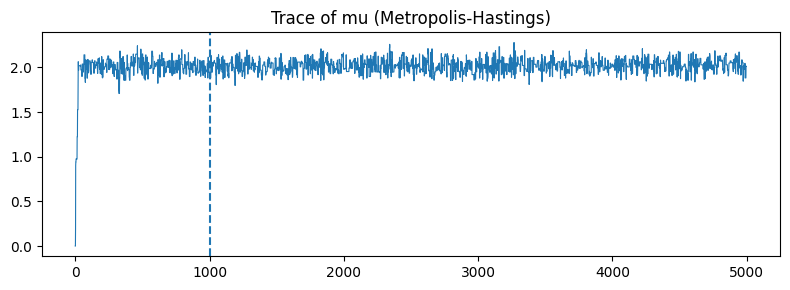

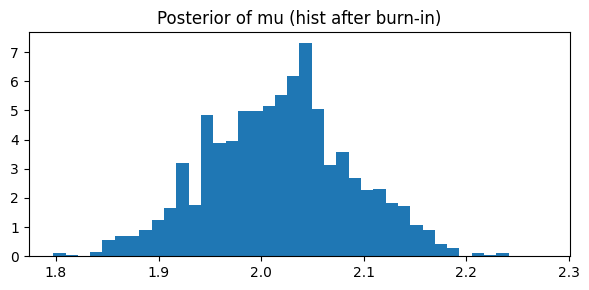

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# データ生成（例）
# -----------------------------
rng = np.random.default_rng(0)
true_mu = 2.0
sigma = 1.0
y = rng.normal(true_mu, sigma, size=200)

# 事前：mu ~ Normal(0, prior_sd^2)
prior_sd = 5.0

def log_post(mu: float) -> float:
    """log posterior up to constant."""
    # log prior
    lp = -0.5 * (mu / prior_sd) ** 2
    # log likelihood
    ll = -0.5 * np.sum(((y - mu) / sigma) ** 2)
    return lp + ll

# -----------------------------
# Metropolis-Hastings
# -----------------------------
n = 5000
burn = 1000
step = 0.25  # 提案分布の幅（受理率が低い/高いなら調整）

mu = 0.0
trace = np.empty(n)
accept = 0

cur = log_post(mu)

for t in range(n):
    prop = mu + rng.normal(0.0, step)   # 対称提案：N(mu, step^2)
    prop_lp = log_post(prop)

    # 受理確率（対称なので比だけ）
    if np.log(rng.random()) < (prop_lp - cur):
        mu = prop
        cur = prop_lp
        accept += 1

    trace[t] = mu

acc_rate = accept / n
post = trace[burn:]

print("acceptance rate:", round(acc_rate, 3))
print("posterior mean (after burn-in):", round(post.mean(), 3))
print("posterior sd   (after burn-in):", round(post.std(), 3))

# -----------------------------
# 可視化
# -----------------------------
plt.figure(figsize=(8, 3))
plt.plot(trace, linewidth=0.8)
plt.axvline(burn, linestyle="--")
plt.title("Trace of mu (Metropolis-Hastings)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
plt.hist(post, bins=40, density=True)
plt.title("Posterior of mu (hist after burn-in)")
plt.tight_layout()
plt.show()
